In [1]:
from __future__ import absolute_import
from __future__  import division
from __future__ import print_function
import tensorflow as tf
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import os

In [3]:
fights_train = np.zeros((204, 40, 160, 160, 3), dtype=float)
labels_train = []

In [4]:
def capture(filename):
    frames = np.zeros((40, 160, 160, 3), dtype=float)
    i=0
    vc = cv2.VideoCapture(filename)
    if vc.isOpened():
        rval , frame = vc.read()
    else:
        rval = False
    #frm = cv2.resize(frame,(200,200))
    frm = resize(frame,(160, 160, 3))
    frm = np.expand_dims(frm,axis=0)
    if(np.max(frm)>1):
        frm = frm/255.0
    frames[i][:] = frm
    i +=1
    while i < 40:
        rval, frame = vc.read()
        #print(i)
        #plt.imshow(frame)
        #plt.show()
        #frm = cv2.resize(frame,(200,200))
        frm = resize(frame,(160, 160, 3))
        frm = np.expand_dims(frm,axis=0)
        if(np.max(frm)>1):
            frm = frm/255.0
        frames[i][:] = frm
        i +=1
        #print(frame)
    return frames

def cut_save(main_dir,mod):
    i = 0
    #fights = np.zeros((399, 40, 200, 200, 3), dtype=np.float)
    #noFights = np.zeros((599, 42, 200, 200, 3), dtype=np.float)
    for x in os.listdir(main_dir):
        if 1 == 1:
            print(main_dir)
            print(x)
            td = os.path.join(main_dir, x)  # Automatically handles path separators
            print(td)
            #for y in os.listdir(main_dir+x+'/'):
                #print(y)
            print(x.lower())
            for file in os.listdir(td):
                fl = os.path.join(td, file)
                videos = capture(fl)
                if mod == 'train':
                    fights_train[i][:][:] = videos
                    i +=1
                    if x.lower() =='fight':
                        labels_train.append(1)
                    else:
                        labels_train.append(0)
                elif mod =='test':
                    fights_test[i][:][:] = videos
                    i +=1
                    if x.lower() =='fight':
                        labels_test.append(1)
                    else:
                        labels_test.append(0)
                elif mod =='val':
                    fights_val[i][:][:] = videos
                    i +=1
                    if x.lower() =='fight':
                        labels_val.append(1)
                    else:
                        labels_val.append(0)

In [6]:
cut_save('C://Users//Akshitha Reddy//Projects//Major project//dataset//half-data',"train")

C://Users//Akshitha Reddy//Projects//Major project//dataset//half-data
Fight
C://Users//Akshitha Reddy//Projects//Major project//dataset//half-data\Fight
fight
C://Users//Akshitha Reddy//Projects//Major project//dataset//half-data
NonFight
C://Users//Akshitha Reddy//Projects//Major project//dataset//half-data\NonFight
nonfight


In [7]:
fights_train.shape


(204, 40, 160, 160, 3)

In [8]:
from sklearn.model_selection import train_test_split

In [12]:
#fights_train = fights_train.astype('float32')
X_train, fights_test, y_train, labels_test = train_test_split(fights_train,labels_train, test_size=0.33, random_state=42)
print(labels_test)

[1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]


In [ ]:
#fights_train = []

In [10]:
fights_test= np.zeros((40, 40, 160, 160, 3), dtype=float)
labels_test = []

In [ ]:
cut_save('C://Users//Akshitha Reddy//Projects//Major project//dataset//half-data-test',"test")

C://Users//Akshitha Reddy//Projects//Major project//dataset//half-data-test
Fight
C://Users//Akshitha Reddy//Projects//Major project//dataset//half-data-test\Fight
fight
C://Users//Akshitha Reddy//Projects//Major project//dataset//half-data-test
NonFight
C://Users//Akshitha Reddy//Projects//Major project//dataset//half-data-test\NonFight
nonfight


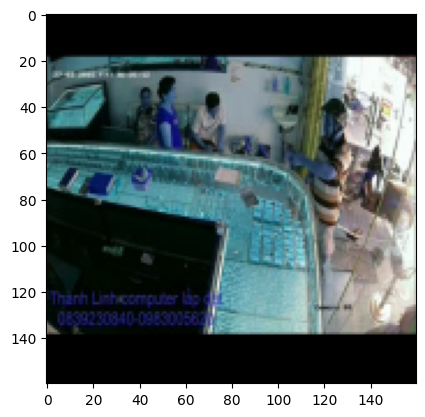

In [13]:
plt.imshow(fights_test[19][5])
plt.show()

In [14]:
layers = tf.keras.layers
models = tf.keras.models
losses = tf.keras.losses
optimizers = tf.keras.optimizers 
metrics = tf.keras.metrics
utils = tf.keras.utils
callbacks = tf.keras.callbacks
layers = tf.keras.layers
models = tf.keras.models
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
losses = tf.keras.losses
optimizers = tf.keras.optimizers 
metrics = tf.keras.metrics
utils = tf.keras.utils
callbacks = tf.keras.callbacks

plot_model = tf.keras.utils.plot_model

In [15]:
np.random.seed(1234)
num_classes = 2

In [16]:
np.random.seed(1234)
num_classes = 2
vg19 = tf.keras.applications.vgg19.VGG19
base_model = vg19(include_top=False,weights='imagenet',input_shape=(160, 160,3))
# Freeze the layers except the last 4 layers
for layer in base_model.layers:
    layer.trainable = False
# Check the trainable status of the individual layers
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 160, 160, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 160, 160, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 80, 80, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 80, 80, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 40, 40, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 40, 40, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 40, 40, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 40, 40, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 40, 40, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 20, 20, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 20, 20, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 10, 10, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [21]:
import numpy as np

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
fights_test = np.array(fights_test, dtype=np.float32)
labels_test = np.array(labels_test, dtype=np.float32)

print(X_train.shape, y_train.shape)
print(fights_test.shape, labels_test.shape)
print(type(X_train), len(X_train))
print(type(X_train[0]))  # Check the type of the first element
# print(y_train)
# print(labels_test)
# y_train = y_train.reshape(-1, 1)  # (72, 1)
# labels_test = labels_test.reshape(-1, 1)  # (40, 1)
# print(y_train)
# print(labels_test)
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)  # Convert labels to (72, 2)
labels_test = to_categorical(labels_test, num_classes=2)  # Convert labels to (40, 2)

print(y_train.shape)  # Should now be (72, 2)
print(labels_test.shape)


(136, 40, 160, 160, 3) (136,)
(68, 40, 160, 160, 3) (68,)
<class 'numpy.ndarray'> 136
<class 'numpy.ndarray'>
(136, 2)
(68, 2)


In [22]:
import time
cnn = models.Sequential()
cnn.add(base_model)
cnn.add(layers.Flatten())

# Define final LSTM model
num_classes = 2
model = models.Sequential()
model.add(layers.TimeDistributed(cnn, input_shape=(40, 160, 160, 3)))
model.add(layers.LSTM(40, return_sequences=True))
model.add(layers.TimeDistributed(layers.Dense(160, activation='relu')))
model.add(layers.GlobalAveragePooling1D(name="globale"))
model.add(layers.Dense(num_classes, activation="sigmoid", name="last"))

# Compile model
adam = optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

# Define callbacks
class AccuracyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.val_acc = []
        self.loss = []
        self.val_loss = []

    def on_epoch_end(self, epoch, logs={}):
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        self.loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

history = AccuracyHistory()
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=8, min_delta=1e-5, verbose=1, mode='min')
mcp_save = callbacks.ModelCheckpoint('mamon98777.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.5, min_lr=1e-7)

# Training parameters
batch_size = 3
epochs = 10

# Start training
print("Training started at", int(round(time.time() * 1000)))
model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(fights_test, labels_test),
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss, history]
)

# Explicitly save final model
model.save("mamon98777.keras")
print("Final model saved as mamon98777.keras")

Training started at 1746157791456
Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 794s 17s/step - accuracy: 0.5407 - loss: 0.7011 - val_accuracy: 0.7206 - val_loss: 0.6303 - learning_rate: 5.0000e-04
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 727s 16s/step - accuracy: 0.7411 - loss: 0.6252 - val_accuracy: 0.7353 - val_loss: 0.6190 - learning_rate: 5.0000e-04
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 724s 16s/step - accuracy: 0.7876 - loss: 0.5806 - val_accuracy: 0.8088 - val_loss: 0.5145 - learning_rate: 5.0000e-04
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 790s 17s/step - accuracy: 0.8663 - loss: 0.3860 - val_accuracy: 0.7794 - val_loss: 0.4931 - learning_rate: 5.0000e-04
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1247s 27s/step - accuracy: 0.9614 - loss: 0.2486 - val_accuracy: 0.7794 - val_loss: 0.4576 - learning_rate: 5.0000e-04
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 841s 19s/step - accuracy: 0.9859 - loss: 0.1048 - val_accuracy: 0.8382 - val_loss: 0.3858 - learning_rate: 5.0000e-04
Epoch 7/10
46/46 ━━━━━━━━━━━━

In [24]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import time

# Constants (must match training)
SEQUENCE_LENGTH = 40
IMG_SIZE = 160
VIOLENCE_THRESHOLD = 0.65  # Same as your training

# Load your trained model
model = load_model("mamon98777.keras")

def preprocess_frame(frame):
    """Identical to your training preprocessing"""
    frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
    frame = frame.astype('float32') / 255.0
    frame = tf.keras.applications.vgg19.preprocess_input(frame)
    
    # Handle grayscale/alpha channels
    if len(frame.shape) == 2:
        frame = np.stack((frame,)*3, axis=-1)
    elif frame.shape[2] == 1:
        frame = np.repeat(frame, 3, axis=-1)
    elif frame.shape[2] == 4:
        frame = frame[:, :, :3]
    return frame

def predict_violence(video_path):
    cap = cv2.VideoCapture(video_path)
    sequence = []
    violence_detected = False
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process frame
        processed = preprocess_frame(frame)
        
        # Maintain sequence
        if len(sequence) >= SEQUENCE_LENGTH:
            sequence.pop(0)
        sequence.append(processed)
        
        # Predict when buffer is full
        if len(sequence) == SEQUENCE_LENGTH:
            input_seq = np.expand_dims(np.array(sequence), axis=0)
            start_time = time.time()
            pred = model.predict(input_seq, verbose=0)[0]
            violence_prob = float(pred[1])
            inference_time = time.time() - start_time
            
            print(f"Violence probability: {violence_prob:.4f} | Inference time: {inference_time:.2f}s")
            
            if violence_prob > VIOLENCE_THRESHOLD:
                print(f"VIOLENCE DETECTED! Confidence: {violence_prob:.2f}")
                violence_detected = True
                # Visual feedback
                cv2.putText(frame, "VIOLENCE DETECTED", (50, 50), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        
        # Display frame
        cv2.imshow('Violence Detection', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()
    return violence_detected

# Usage
video_path = "0_DzLlklZa0_2.avi"  # Replace with your video path
print(f"Testing video: {video_path}")
result = predict_violence(video_path)
print("\nFinal Result:", "Violence detected!" if result else "No violence detected")

Testing video: 0_DzLlklZa0_2.avi
Violence probability: 0.9897 | Inference time: 106.22s
VIOLENCE DETECTED! Confidence: 0.99
Violence probability: 0.9897 | Inference time: 20.41s
VIOLENCE DETECTED! Confidence: 0.99
Violence probability: 0.9897 | Inference time: 21.38s
VIOLENCE DETECTED! Confidence: 0.99
Violence probability: 0.9897 | Inference time: 23.93s
VIOLENCE DETECTED! Confidence: 0.99
Violence probability: 0.9897 | Inference time: 35.81s
VIOLENCE DETECTED! Confidence: 0.99
Violence probability: 0.9897 | Inference time: 40.99s
VIOLENCE DETECTED! Confidence: 0.99
Violence probability: 0.9897 | Inference time: 11.90s
VIOLENCE DETECTED! Confidence: 0.99
Violence probability: 0.9897 | Inference time: 13.44s
VIOLENCE DETECTED! Confidence: 0.99
Violence probability: 0.9897 | Inference time: 12.12s
VIOLENCE DETECTED! Confidence: 0.99
Violence probability: 0.9897 | Inference time: 11.37s
VIOLENCE DETECTED! Confidence: 0.99
Violence probability: 0.9897 | Inference time: 12.81s
VIOLENCE DET

In [ ]:
num_classes = 2

# CNN model
cnn = models.Sequential()
cnn.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(160, 160, 3)))  # Reduced filters from 32 to 16
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))  # Reduced filters from 64 to 32
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(256, activation='relu'))  # Reduced Dense layer from 512 to 256
cnn.add(layers.Dropout(0.2))  # Lowered dropout for faster convergence

# LSTM model
model = models.Sequential()
model.add(layers.TimeDistributed(cnn, input_shape=(40, 160, 160, 3)))
model.add(layers.LSTM(20, return_sequences=True))  # Reduced from 40 to 20
model.add(layers.TimeDistributed(layers.Dense(160, activation='relu')))
model.add(layers.GlobalAveragePooling1D(name="globale"))
model.add(layers.Dense(num_classes, activation="sigmoid", name="last"))

# Compile the model
adam = optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

# Load pre-trained weights if available
try:
    model.load_weights('mamon98777.hdf5')
    print("Loaded pre-trained weights successfully.")
except Exception as e:
    print(f"Could not load weights: {e}")

# Display model summary
model.summary()

Loaded pre-trained weights successfully.


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_12             │ (None, 40, 256)        │    11,834,592 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 40, 20)         │        22,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_13             │ (None, 40, 160)        │         3,360 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ globale                         │ (None, 160)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last (Dense)                    │ (None, 2)              │           322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,860,434 (45.24 MB)

 Trainable params: 11,860,434 (45.24 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

class AccuracyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.val_acc = []
        self.loss = []
        self.val_loss = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

history = AccuracyHistory()
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=8,min_delta=1e-5, verbose=0, mode='min')
mcp_save = callbacks.ModelCheckpoint('mamon98777.keras', save_best_only=True, monitor='val_loss', mode='min')

reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='val_loss',patience=1, verbose=2,factor=0.5,min_lr=0.0000001)


In [ ]:
batch_size =3
epochs = 10

In [ ]:
y_train = utils.to_categorical(labels_train)
print(y_train)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
y_test = utils.to_categorical(labels_test)
print(y_test)

[[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]]


In [ ]:
print(fights_train)
fights_train = np.array(fights_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
print(f"fights_train shape: {fights_train.shape}")
print(f"y_train shape: {y_train.shape}")


[[[[[1.84459293e-02 3.62069041e-02 3.32978454e-02]
    [1.46355149e-02 2.16894334e-02 2.03813980e-02]
    [1.58798175e-02 2.30005791e-02 2.19646503e-02]
    ...
    [1.02977608e-02 1.79002875e-02 1.66321791e-02]
    [4.27512600e-03 1.85667336e-03 1.66206243e-03]
    [3.92170005e-03 3.51775324e-06 3.05693959e-06]]

   [[1.81921147e-02 1.52335159e-02 1.53824294e-02]
    [1.32956959e-02 1.45511021e-03 2.73365336e-03]
    [1.47441673e-02 1.75547971e-03 3.66773433e-03]
    ...
    [1.21566519e-02 1.72566187e-03 2.58647528e-03]
    [5.11388359e-03 2.68769378e-04 3.75162778e-04]
    [3.92479733e-03 8.55512105e-07 1.23313837e-06]]

   [[2.07062282e-02 1.41926229e-02 1.44793133e-02]
    [1.49160439e-02 3.79447995e-04 8.24983115e-04]
    [1.67258764e-02 8.95278477e-05 2.16107184e-04]
    ...
    [1.47551365e-02 7.31712009e-05 1.27534896e-04]
    [5.52325447e-03 1.89446278e-05 2.79833364e-05]
    [3.92551663e-03 7.33776961e-08 1.04176228e-07]]

   ...

   [[3.32198556e-03 3.31371081e-03 3.3361036

In [ ]:
import time
millis = int(round(time.time() * 1000))
print("started at " , millis)

model.fit(fights_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(fights_test, _test),callbacks=[earlyStopping, mcp_save, reduce_lr_loss,history])

#0.8995 4

started at  1743343614001
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5553 - loss: 0.6985

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 2, 2), output.shape=(None, 2)

In [ ]:
fights_test = []

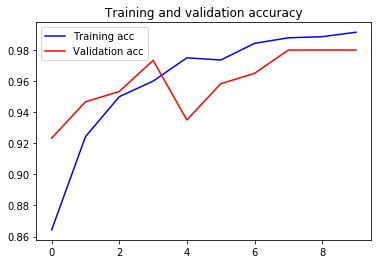

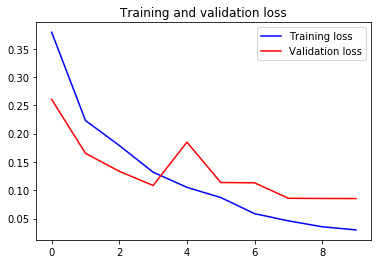

In [ ]:
acc = history.acc
val_acc = history.val_acc
loss = history.loss
val_loss = history.val_loss
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [ ]:
fights_train = []

In [ ]:
score = model.evaluate(fights_test, y_test, batch_size=3)
score


300/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.08618128929287196, 0.98]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [ ]:
Y_pred = model.predict(fights_test , batch_size=1)

In [ ]:
yprd = Y_pred > 0.5
yprd

array([[False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [Fal

In [ ]:
ypredicted = []
for zero,one in yprd:
    if zero == True:
        ypredicted.append(0)
    else:
        ypredicted.append(1) 

In [ ]:
ypredicted

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
y = []

for zero,one in y_test:
    if zero == True:
        y.append(0)
    else:
        y.append(1) 

In [ ]:
confusion = confusion_matrix(y,ypredicted)
confusion.shape

(2, 2)

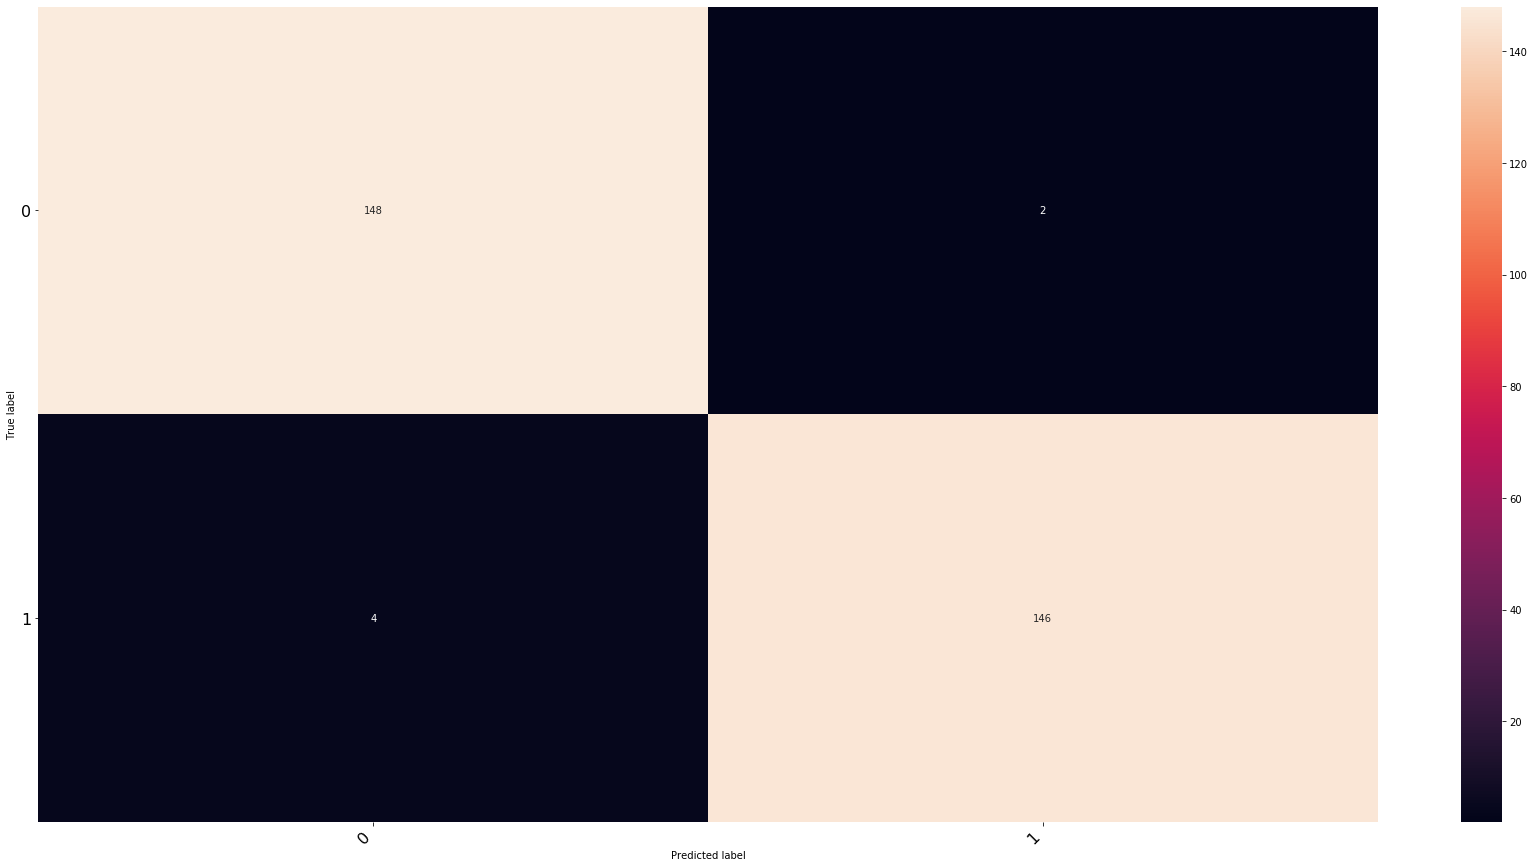

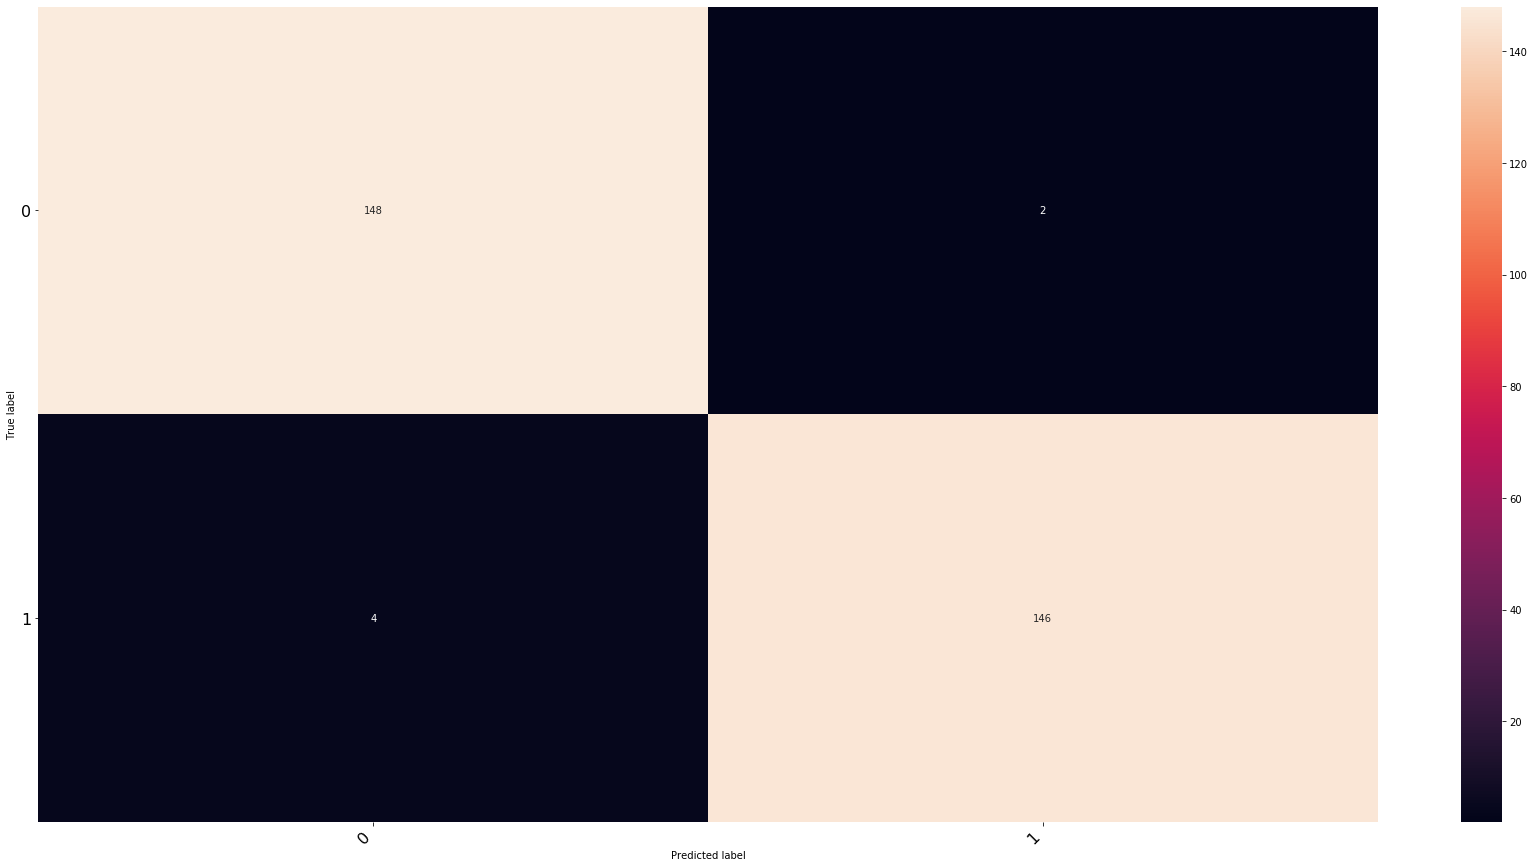

In [ ]:
print_confusion_matrix(confusion, [0,1], figsize = (30,15), fontsize=16)

In [ ]:
print('Classification Report')
print(classification_report(y, ypredicted, target_names=['no-violance','violance']))

Classification Report
              precision    recall  f1-score   support

 no-violance       0.97      0.99      0.98       150
    violance       0.99      0.97      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [ ]:
model.save("mamonbest980hocky.hdfs")